

# <h1><center>Kaggle 2019 Survey India vs USA!</center></h1>

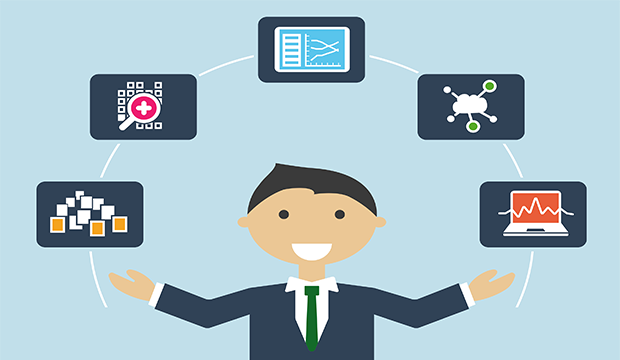

**Data Science!!!** when we hear this term only thing that comes to our mind is **it is the Next Big Thing** and as an industry with a growth rate 7% faster than all of the rest, it is surely the next big thing.Data  scientists have great responsibilities on their shoulders but great responsibilities come with big pockets! which is why Data Scientists are highly paid professionals across the globe.

## Objective
India is clearly on a progressive trend when it comes to adopting emerging technologies and So the USA.Many industries in India are hiring data scientists to help them gather insights from the big data they already have.
In this notebook we will compare these two countries and will try to find which in doing better.

### 1. Participation of countries in the survey

Let's look at the top 10 countries participated in this survey

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

class style:
    BOLD = '\033[1m'
    END = '\033[0m'

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Graphics in retina format
%config InlineBackend.figure_format = 'retina'

# set figure size
plt.rcParams['figure.figsize'] = 10, 10

%run Functions.ipynb

In [13]:
df = pd.read_csv('../Kaggle Survey/Data/multiple_choice_responses.csv')
df.drop(index=0,inplace=True)

df['Q3'] = df['Q3'].str.replace('United States of America','USA')

top_10_countries = pd.DataFrame(round(df['Q3'].value_counts()/len(df)*100)[:10])

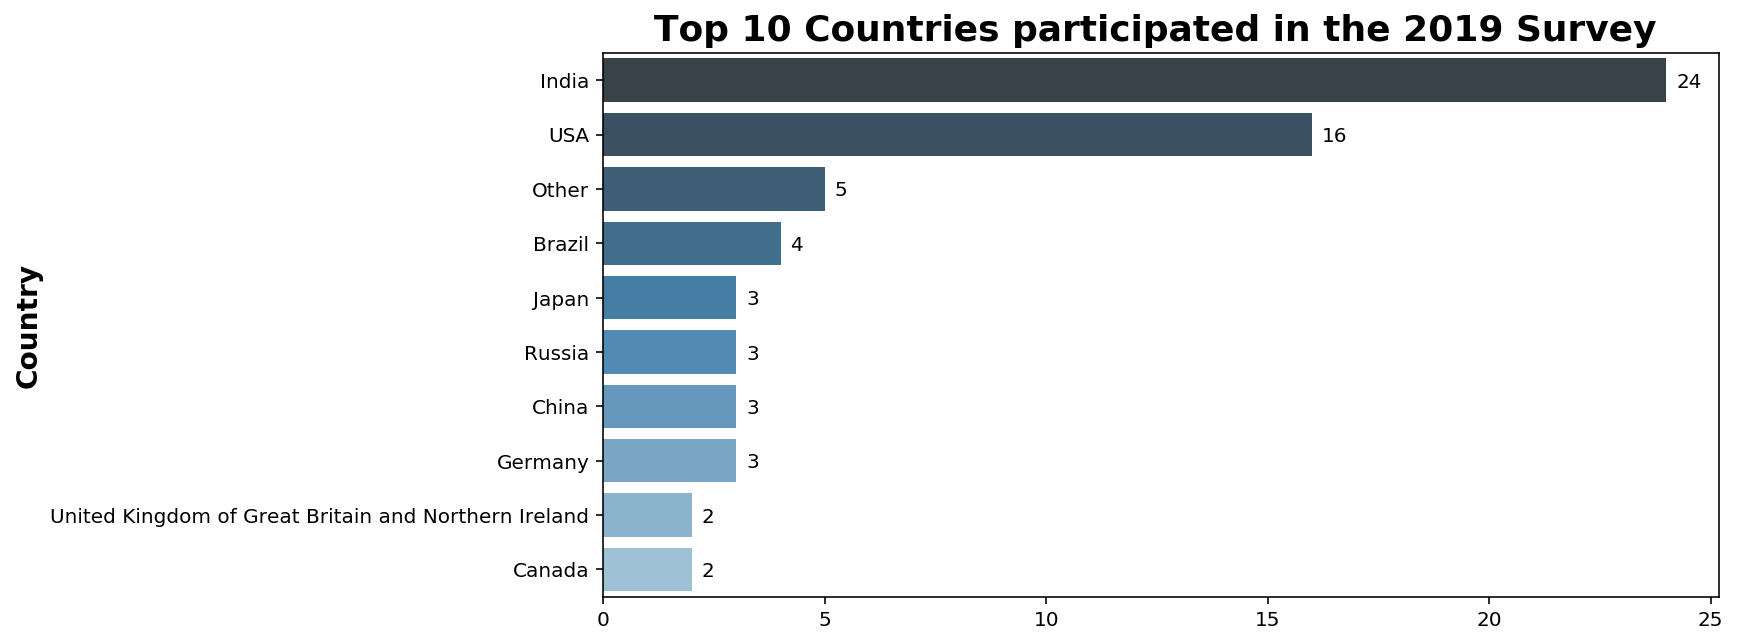

In [14]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'



plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_10_countries['Q3'],y=top_10_countries.index,data=top_10_countries,palette='Blues_d',orient='h')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')
plt.ylabel('Country')
plt.xlabel('')
plt.title('Top 10 Countries participated in the 2019 Survey ')
plt.show()


India tops the table followed by USA.In fact these two countries makes almost half the population in this survey, which means we have healthy sample to analyze these two countries.

Let's begin our comparision now.

### 2. Age Distribution


In [15]:
india_Age = pd.DataFrame(df[df['Q3']=='India']['Q1'].value_counts())
usa_Age = pd.DataFrame(df[df['Q3']=='USA']['Q1'].value_counts())


pie_india = go.Pie(labels=india_Age.index,values=india_Age['Q1'],name="India",hole=0.3,domain={'x': [0,0.46]})
pie_USA = go.Pie(labels=usa_Age.index,values=usa_Age['Q1'],name="USA",hole=0.3,domain={'x': [0.52,1]})

layout = dict(title = 'Age of Respondents in 2019', font=dict(size=10), legend=dict(orientation="v"),
              annotations = [dict(x=0.2, y=0.5, text='India', showarrow=False, font=dict(size=20)),
                             dict(x=0.79, y=0.5, text='USA', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_india, pie_USA], layout=layout)
py.iplot(fig)


Interesting!!! **29%** of the participants from India falls in 18-21years Age band.which means data science is popular or rather we can say it is the hot topic among the youngsters in india.If we further look closer at the distribution in India we can see that almost **76%** of the participants from India are under the Age band of 18-29years and this is the age group in which students completes their high school and choses a stream in which they can build a strong base for the career of their dreams, those who already started their journey tries to find out the right path for them.

In case of USA it seems to be a different case.**52%** of the USA population falls under the age group **25-39years**

### 3. Highest level of formal Education


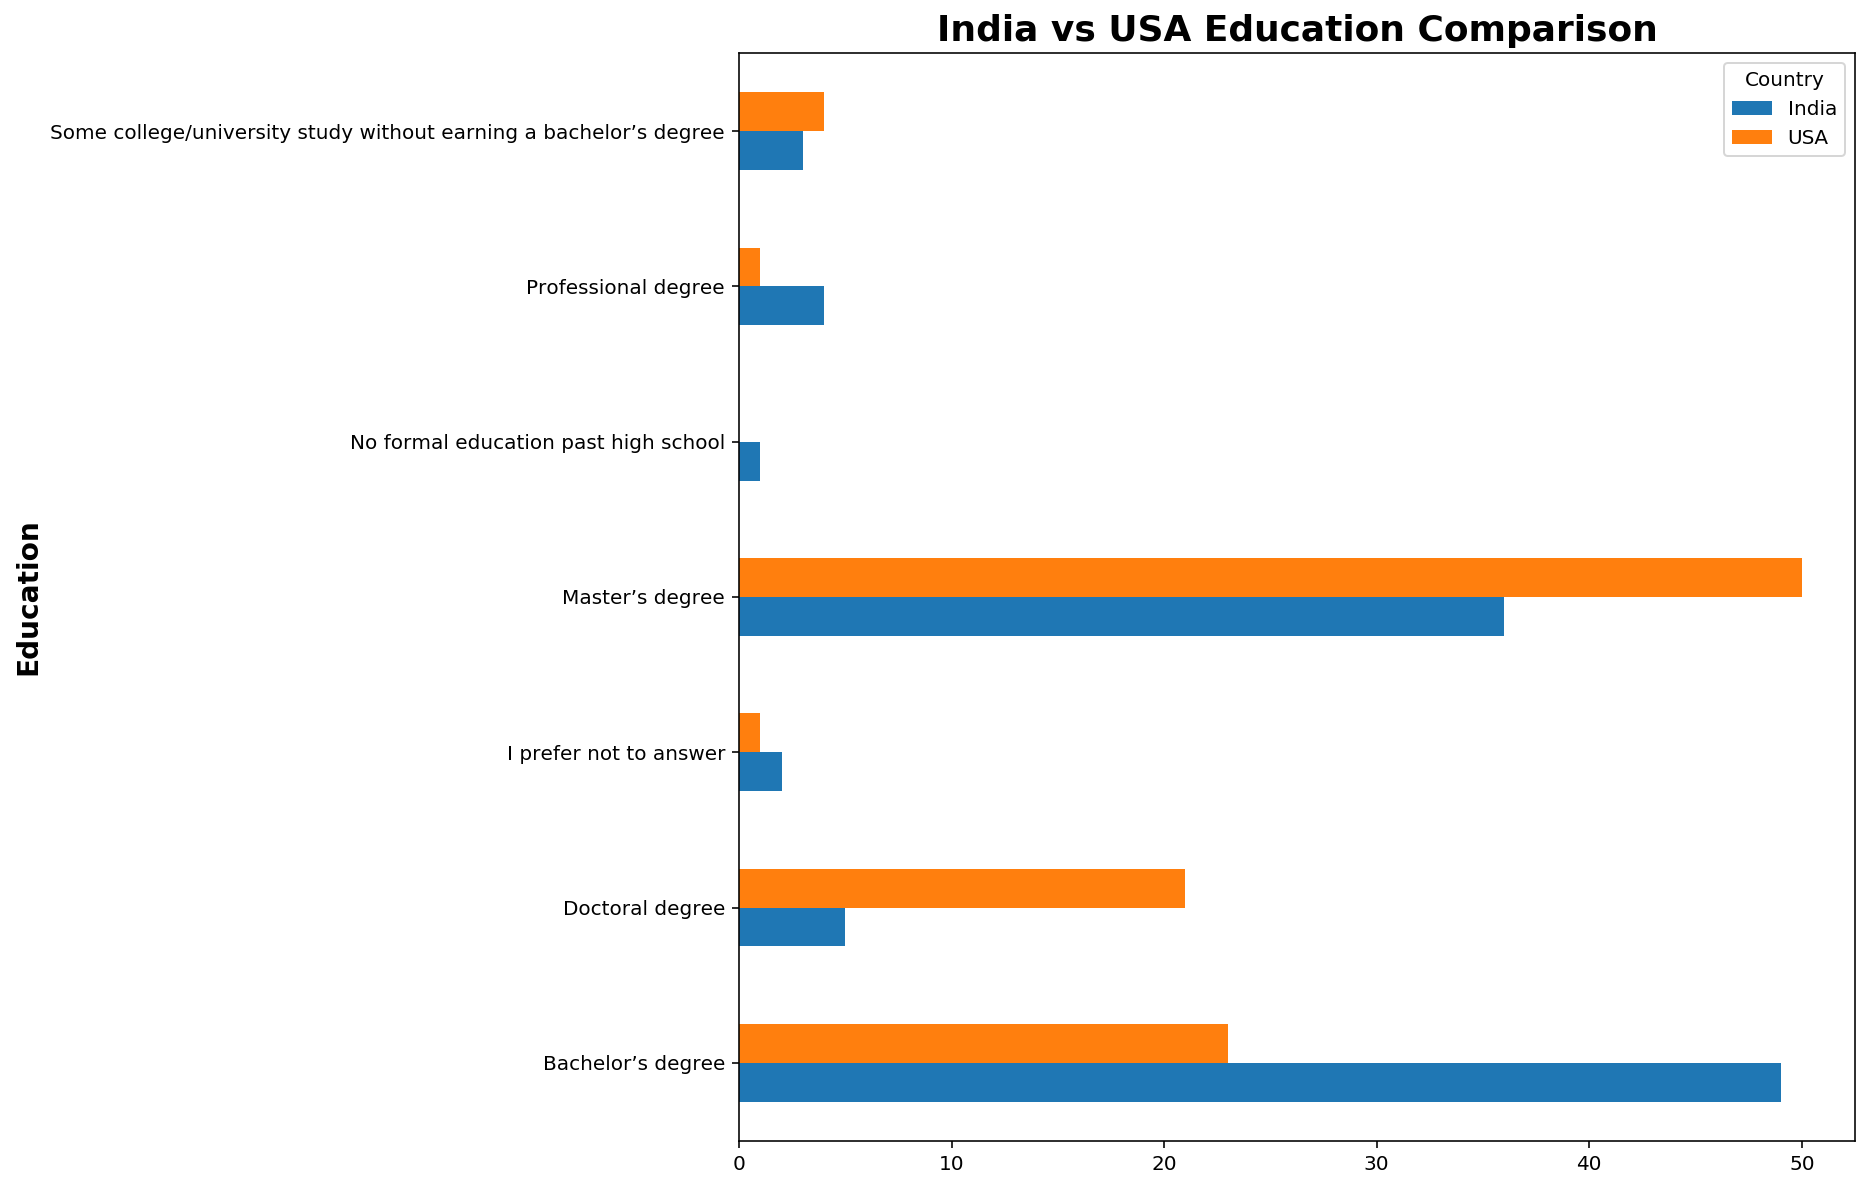

In [16]:
df['All'] = 1
Education = df.pivot_table(index='Q4',columns='Q3',values='All',aggfunc=len)
top2_countries = top_10_countries[:2].index.tolist()
Education = Education[top2_countries]
for i in top2_countries:
    Education[i] = round((Education[i]/sum(Education[i]))*100)


ax = Education.plot.barh()
plt.ylabel('Education')
plt.title('India vs USA Education Comparison')
plt.legend(title='Country')
plt.show()

Bachelor's degree makes almost the half of the population in India followed by Master's degree with 36% and Doctoral degree with 5%.Whereas in in US Master's degree covers the half of the population of this survey and Master's/Doctoral degree represents around 71% US participants in this survey.Another reason for having less Post graduates in India is that many of the students in India goes for Masters in US and other countries post completing thier bachelor's.

We can say that conversion rate of Batchelor's to Master's degree in US is higher than India amoung the data science aspirants.And this obvious since many of US universities includes data science master degree in their post graduate programs.person who wants to build his/her career in data science will really look to go for such programs

### 4. Profession

In [18]:
india_edu = pd.DataFrame(df[df['Q3']=='India']['Q5'].value_counts())
usa_edu = pd.DataFrame(df[df['Q3']=='USA']['Q5'].value_counts())


pie_india = go.Pie(labels=india_edu.index,values=india_edu['Q5'],name="India",hole=0.4,domain={'x': [0,0.46]})
pie_USA = go.Pie(labels=usa_edu.index,values=usa_edu['Q5'],name="USA",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Occupation of Respondents in 2019', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='India', showarrow=False, font=dict(size=20)),
                             dict(x=0.79, y=0.5, text='USA', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_india, pie_USA], layout=layout)
py.iplot(fig)


Well no wonder Students are having majority of stake **approx 33%** for India as we have already seen from the age distribution of india that **29%** of the participants were from **18-21 years** age group and around **56%** in 18-24years.On the second rank comes the Data Scientists followed by Software Engg. on the 3rd postion.

Data scientists lead this survey in case of the USA followed by students on the second positions.No wonder why USA has the more data scientists under the umbrella as compared to India as the universities in US provides Data science programs in their UG/PG programs.

India has the more no of software Engg. as compared to US.

Unemployment ratio in India is high.

Further more analysing the above chart we can see that US has around 52% of the people dealing with the data in their professional life whereas in India it is 35%


**Points to note:**
- It is a good sign for India that students are showing more interest in data science.
- Introducing Data Science programs in graduate/post graduate programs in India will be helpful in producing Data Science industry ready professionals, which will definitely full fill the short fall of data scientists in the industries 

### 5. Money made by Professionals

In [19]:
df['income'] = df['Q10'].apply(lambda x: 35000 if x=='30,000-39,999' else 6250 if x=='5,000-7,499' else 275000
if x=='250,000-299,999' else 4500 if x=='4,000-4,999' else  65000 if x=='60,000-69,999' else
12500 if x=='10,000-14,999' else
85000 if x=='80,000-89,999' else
500 if x=='$0-999' else
2500 if x=='2,000-2,999' else
75000 if x=='70,000-79,999' else
95000 if x=='90,000-99,999' else
137500 if x=='125,000-149,999' else
45000 if x=='40,000-49,999' else
22500 if x=='20,000-24,999' else
17500 if x=='15,000-19,999' else
112500 if x=='100,000-124,999' else
8750 if x=='7,500-9,999' else
175000 if x=='150,000-199,999' else
27500 if x=='25,000-29,999' else
3500 if x=='3,000-3,999' else
1500 if x=='1,000-1,999' else
225000 if x=='200,000-249,999' else
55000 if x=='50,000-59,999' else
750000 if x=='> $500,000' else
400000 if x=='300,000-500,000' else 0)

In [21]:
df_IndUSA = df[df['Q3'].isin(['India','USA'])]
Sal = round(df_IndUSA[~df_IndUSA['Q5'].isin(['Not employed','Student'])].groupby('Q3')['income'].mean())

x = Sal.index
y = Sal.values


# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x,
            y=y,
            text=y,
            width=0.4,
            textposition='auto',
            marker=dict(color='green')
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title='Salary (in USD)'),width=700,height=500,
                  title='Salary Overall level India vs USA',
                  xaxis=dict(title='Country'))
fig.show()


Now there is a huge difference in terms of payscale between India and US at an overall level.

US companies pays 7 times more than India to their working professionals.Even if we consider the fact that cost of living and other expenses in US are higher than India still 7 times higher pay will definitely make things liltle bit easier for you 😊

Let's look at the salaries by designations in both the countries

In [25]:
Salary = round(df_IndUSA.pivot_table(index="Q5", columns="Q3", values="income").fillna(0)).sort_values(by='USA')
India_Salary = Salary['India'].values*-1
USA_Salary = Salary['USA'].values

y = Salary.index

layout = go.Layout(yaxis=go.layout.YAxis(title='salary'),
                   xaxis=go.layout.XAxis(
                       range=[-150000, 150000],
                       tickvals=[-150000, 0, 150000],
                       ticktext=[150000, 0, 150000]),
                   barmode='overlay',
                   title='Salary Comparision by Job titile',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=USA_Salary,
               orientation='h',
               name='USA',
               hoverinfo='x',
               marker=dict(color='darkgreen')
               ),
        go.Bar(y=y,
               x=India_Salary,
               orientation='h',
               name='India',
               text= -1* India_Salary.astype('int'),
               hoverinfo='text',
               marker=dict(color='blueviolet')
               )]

py.iplot(dict(data=data, layout=layout), filename='EXAMPLES/bar_pyramid')


Highest paying job in both the countries turns out to be Product/Project manager followed by Data scientists and in case of US with a very little margin i.e. less than 2K USD whereas in India differnce between salaries of Data Scientists and Product/Project manager is high i.e. aprox 14K USD.

US clearly wins in pay for all the designations with a huge diference.

### 6. Company Size and people working Under data Science

In [26]:
df_IndUSA = df[df['Q3'].isin(['India','USA'])]
Company_size = df_IndUSA.pivot_table(index='Q7',columns=['Q6','Q3'],values='All',aggfunc=len)
Company_cols = Company_size.columns.to_list()
for i in Company_cols:
    Company_size[i] = round((Company_size[i]/sum(Company_size[i]))*100)

Company_size.style.apply(lambda x: ["background: lightgreen" if v > 30 else "" for v in x], axis = 1)

74% Companies with employees >10,000 in US have data science team strength of 20+ whereas in India it is 53%.

It seems that bigger companies in US are more focused in increasing man power in of data science team than India.

Also around 12% Indian comapanies with emoployees >1000 are not having data science team whereas in US it is only 4%.

## Key Takeaways

- Majority of participants from India in this survey are Students, which shows that younger genereation in India is keen to learn the data science. With proper plan and introducing data science(ML/DL) programs in unversity programs can increase the number of data scientists in India which in turn help filling the short fall of data scientist in the industry.This will also help in growing number of Post graduates.

- Salary seems to be major concern in India as comapred to US, even if we compare the salary of professional working in India against the other countries it is still very less.

- Large scale comapnies should try expand their data science teams in India.